In [2]:
import numpy as np
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
path = os.getcwd()

In [4]:
df = pd.read_csv(path+'\\data\\listings.csv.gz', compression='gzip')

C:\Users\pam\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head()

id                        listing_url       scrape_id last_scraped  \
0  2265  https://www.airbnb.com/rooms/2265  20200719161413   2020-07-20   
1  5245  https://www.airbnb.com/rooms/5245  20200719161413   2020-07-19   
2  5456  https://www.airbnb.com/rooms/5456  20200719161413   2020-07-20   
3  5636  https://www.airbnb.com/rooms/5636  20200719161413   2020-07-19   
4  5769  https://www.airbnb.com/rooms/5769  20200719161413   2020-07-20   

                                                name  \
0   Zen-East in the Heart of Austin (monthly rental)   
1  Eco friendly, Colorful, Clean, Cozy monthly share   
2          Walk to 6th, Rainey St and Convention Ctr   
3  SOCO, BARTON SPRGS, Bouldin, PRIVATE Guest Cot...   
4                                     NW Austin Room   

                                             summary  \
0  Zen East is situated in a vibrant & diverse mu...   
1  Situated in a vibrant & diverse multicultural ...   
2  Great central  location for walking to Convent...   
3  MONTHLY Short Term  Located in the awesome Bou...   
4                                                NaN   

                                               space  \
0  This colorful and clean 1923 house was complet...   
1  This green, colorful, clean and cozy house was...   
2  Cute Private Studio apartment located in Willo...   
3  Hip area in old South Central Austin (SoCo)Jus...   
4  Looking for a comfortable inexpensive room to ...   

                                         description experiences_offered  \
0  Zen East is situated in a vibrant & diverse mu...                none   
1  Situated in a vibrant & diverse multicultural ...                none   
2  Great central  location for walking to Convent...                none   
3  MONTHLY Short Term  Located in the awesome Bou...                none   
4  Looking for a comfortable inexpensive room to ...                none   

                               neighborhood_overview  ... instant_bookable  \
0                                                NaN  ...                f   
1                                                NaN  ...                f   
2  My neighborhood is ideally located if you want...  ...                f   
3  This area is one of the top areas in Austin to...  ...                t   
4  Quiet neighborhood with lots of trees and good...  ...                f   

  is_business_travel_ready          cancellation_policy  \
0                        f  strict_14_with_grace_period   
1                        f  strict_14_with_grace_period   
2                        f  strict_14_with_grace_period   
3                        f  strict_14_with_grace_period   
4                        f                     moderate   

  require_guest_profile_picture require_guest_phone_verification  \
0                             f                                f   
1                             f                                f   
2                             f                                t   
3                             f                                f   
4                             t                                t   

   calculated_host_listings_count  \
0                               3   
1                               3   
2                               1   
3                               2   
4                               1   

   calculated_host_listings_count_entire_homes  \
0                                            2   
1                                            2   
2                                            1   
3                                            2   
4                                            0   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            1   
2                                            0   
3                                            0   
4                                            1   

   calculated_host_listings_

In [6]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10321 entries, 0 to 10320
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(22), object(61)
memory usage: 8.3+ MB


In [10]:
for i in df.dtypes:
    print(i)

int64
object
int64
object
object
object
object
object
object
object
object
object
object
object
object
float64
float64
object
float64
int64
object
object
object
object
object
object
object
object
object
object
object
object
float64
float64
object
object
object
object
object
int64
float64
object
object
float64
object
object
object
object
float64
float64
object
object
object
int64
float64
float64
float64
object
object
float64
object
object
object
object
object
int64
object
int64
int64
int64
int64
int64
int64
float64
float64
object
object
int64
int64
int64
int64
object
int64
int64
object
object
float64
float64
float64
float64
float64
float64
float64
object
object
object
object
object
object
object
object
int64
int64
int64
int64
float64


In [11]:
for i in df.columns.unique():
    print(i)

id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_ni

In [12]:
df = df[['neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
        'city', 'zipcode', 'market', 'smart_location', 'latitude', 'longitude', 
         'property_type', 'room_type', 'bathrooms', 'bedrooms', 'price',
        'weekly_price', 'monthly_price']]

In [13]:
df.head()

neighbourhood  neighbourhood_cleansed  neighbourhood_group_cleansed  \
0      East Downtown                   78702                           NaN   
1      East Downtown                   78702                           NaN   
2      East Downtown                   78702                           NaN   
3      Bouldin Creek                   78704                           NaN   
4  SW Williamson Co.                   78729                           NaN   

     city  zipcode  market smart_location  latitude  longitude property_type  \
0  Austin  78702.0  Austin     Austin, TX  30.27750  -97.71398         House   
1  Austin  78702.0  Austin     Austin, TX  30.27577  -97.71379         House   
2  Austin  78702.0  Austin     Austin, TX  30.26112  -97.73448    Guesthouse   
3  Austin  78704.0  Austin     Austin, TX  30.24630  -97.76361     Apartment   
4  Austin  78729.0  Austin     Austin, TX  30.45697  -97.78422         House   

         room_type  bathrooms  bedrooms    price weekly_price monthly_price  
0  Entire home/apt        2.0       2.0  $225.00          NaN           NaN  
1     Private room        1.0       1.0  $100.00          NaN           NaN  
2  Entire home/apt        1.0       1.0   $95.00          NaN           NaN  
3  Entire home/apt        1.0       1.0   $55.00      $599.00     $1,350.00  
4     Private room        1.0       1.0   $40.00      $160.00           NaN

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10321 entries, 0 to 10320
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   neighbourhood                 9536 non-null   object 
 1   neighbourhood_cleansed        10321 non-null  int64  
 2   neighbourhood_group_cleansed  0 non-null      float64
 3   city                          10319 non-null  object 
 4   zipcode                       10246 non-null  float64
 5   market                        10313 non-null  object 
 6   smart_location                10321 non-null  object 
 7   latitude                      10321 non-null  float64
 8   longitude                     10321 non-null  float64
 9   property_type                 10321 non-null  object 
 10  room_type                     10321 non-null  object 
 11  bathrooms                     10307 non-null  float64
 12  bedrooms                      10310 non-null  float64
 13  p

In [15]:
df = df[['neighbourhood', 'zipcode', 'latitude', 'longitude', 'property_type', 
        'room_type', 'bathrooms', 'bedrooms', 'price']]

In [18]:
df.head()

neighborhood  zipcode  latitude  longitude property_type  \
0      East Downtown  78702.0  30.27750  -97.71398         House   
1      East Downtown  78702.0  30.27577  -97.71379         House   
2      East Downtown  78702.0  30.26112  -97.73448    Guesthouse   
3      Bouldin Creek  78704.0  30.24630  -97.76361     Apartment   
4  SW Williamson Co.  78729.0  30.45697  -97.78422         House   

         room_type  bathrooms  bedrooms    price  
0  Entire home/apt        2.0       2.0  $225.00  
1     Private room        1.0       1.0  $100.00  
2  Entire home/apt        1.0       1.0   $95.00  
3  Entire home/apt        1.0       1.0   $55.00  
4     Private room        1.0       1.0   $40.00

In [19]:
df.columns = ['neighborhood', 'zipcode', 'latitude', 'longitude',
             'property_type', 'room_type', 'bathrooms', 'bedrooms', 'price']

In [20]:
df.dtypes

neighborhood      object
zipcode          float64
latitude         float64
longitude        float64
property_type     object
room_type         object
bathrooms        float64
bedrooms         float64
price             object
dtype: object

In [32]:
df['zipcode'].unique()

array([78702, 78704, 78729, 78741, 78748, 78705, 78759, 78703, 78757,
       78749, 78727, 78731, 78758, 78744, 78751, 78722, 78725, 78701,
       78721, 78723, 78752, 78732, 78746, 78745, 78728, 78730, 78724,
       78753, 78756, 78754, 78735, 78734, 78739, 78733, 78737, 78738,
       78726, 78717, 78750, 78736, 78652, 78620, 78742, 78747, 78712,
       78669, 78681, 78767, 78719, 78660, 78653, 78617])

In [28]:
df['zipcode'] = df['zipcode'].fillna(df['zipcode'].mean())

In [30]:
df['zipcode'] = df['zipcode'].astype(int)

In [31]:
df.dtypes

neighborhood      object
zipcode            int32
latitude         float64
longitude        float64
property_type     object
room_type         object
bathrooms        float64
bedrooms         float64
price             object
dtype: object

In [33]:
df['property_type'].unique()

array(['House', 'Guesthouse', 'Apartment', 'Guest suite', 'Condominium',
       'Townhouse', 'Bungalow', 'Loft', 'Other', 'Cabin',
       'Bed and breakfast', 'Campsite', 'Tent', 'Villa', 'Camper/RV',
       'Cottage', 'Tiny house', 'Boutique hotel', 'Yurt', 'Bus',
       'Serviced apartment', 'Tipi', 'Treehouse', 'Barn', 'Boat',
       'Hostel', 'Chalet', 'Houseboat', 'Resort', 'Aparthotel',
       'Farm stay', 'Hotel', 'Dome house', 'Earth house'], dtype=object)

In [34]:
df['property_type'] = df['property_type'].astype('category')

In [35]:
df.dtypes

neighborhood       object
zipcode             int32
latitude          float64
longitude         float64
property_type    category
room_type          object
bathrooms         float64
bedrooms          float64
price              object
dtype: object

In [36]:
df['room_type'] = df['room_type'].astype('category')

In [37]:
df.dtypes

neighborhood       object
zipcode             int32
latitude          float64
longitude         float64
property_type    category
room_type        category
bathrooms         float64
bedrooms          float64
price              object
dtype: object

In [38]:
for i in df['price'].unique():
    print(i)

$225.00
$100.00
$95.00
$55.00
$40.00
$99.00
$139.00
$300.00
$550.00
$220.00
$150.00
$52.00
$35.00
$59.00
$350.00
$105.00
$32.00
$130.00
$89.00
$145.00
$159.00
$110.00
$125.00
$470.00
$85.00
$49.00
$230.00
$109.00
$90.00
$115.00
$170.00
$821.00
$400.00
$68.00
$195.00
$245.00
$750.00
$404.00
$50.00
$69.00
$80.00
$119.00
$199.00
$508.00
$47.00
$45.00
$329.00
$70.00
$78.00
$60.00
$260.00
$295.00
$136.00
$129.00
$373.00
$499.00
$79.00
$800.00
$346.00
$270.00
$124.00
$184.00
$250.00
$185.00
$500.00
$450.00
$81.00
$175.00
$399.00
$154.00
$210.00
$67.00
$65.00
$600.00
$650.00
$625.00
$240.00
$149.00
$749.00
$495.00
$75.00
$111.00
$1,000.00
$200.00
$120.00
$34.00
$370.00
$299.00
$155.00
$430.00
$58.00
$675.00
$908.00
$248.00
$141.00
$1,050.00
$325.00
$135.00
$795.00
$194.00
$101.00
$2,150.00
$15.00
$595.00
$575.00
$1,200.00
$695.00
$82.00
$102.00
$599.00
$255.00
$415.00
$165.00
$899.00
$211.00
$132.00
$249.00
$700.00
$1,499.00
$2,000.00
$275.00
$51.00
$545.00
$144.00
$1,250.00
$228.00
$1,633.00

In [45]:
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')

In [46]:
df['price']

0        225.00
1        100.00
2         95.00
3         55.00
4         40.00
          ...  
10316    499.00
10317     70.00
10318     59.00
10319     75.00
10320     44.00
Name: price, Length: 10321, dtype: object

In [42]:
df.dtypes

neighborhood       object
zipcode             int32
latitude          float64
longitude         float64
property_type    category
room_type        category
bathrooms         float64
bedrooms          float64
price              object
dtype: object

In [47]:
df['price'] = df['price'].astype(float)

In [48]:
df.dtypes

neighborhood       object
zipcode             int32
latitude          float64
longitude         float64
property_type    category
room_type        category
bathrooms         float64
bedrooms          float64
price             float64
dtype: object

In [83]:
df.isnull().sum(axis=0)

neighborhood     785
zipcode            0
latitude           0
longitude          0
property_type      0
room_type          0
bathrooms         14
bedrooms          11
price              0
dtype: int64

In [84]:
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mean())
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mean())

---

## Exploratory Data Analysis

Text(0.5, 1.0, 'Histogram of Listing Prices')

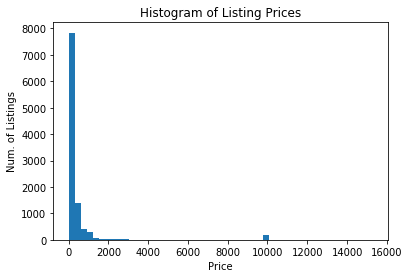

In [49]:
plt.hist(df['price'], bins=50)
plt.xlabel('Price')
plt.ylabel('Num. of Listings')
plt.title('Histogram of Listing Prices')

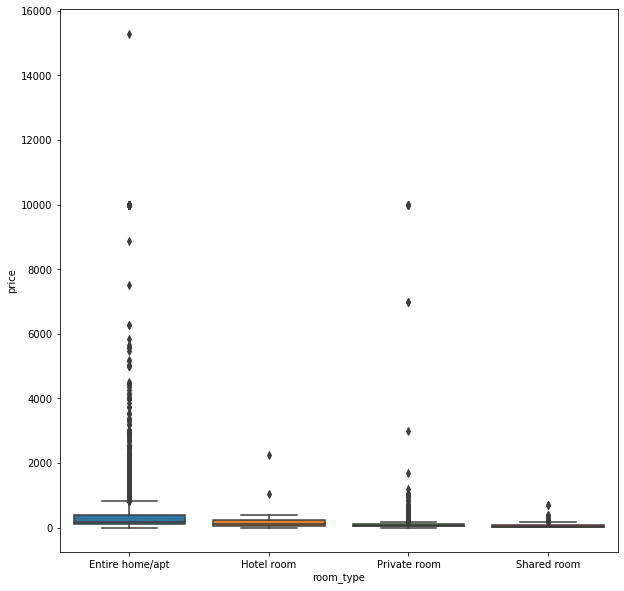

In [50]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='room_type', y='price', data=df, ax=ax)

In [52]:
rooms = list(df['room_type'].unique())
colors = ['blue', 'red', 'yellow', 'green']

room_colors = dict(zip(rooms, colors))
print(room_colors)

{'Entire home/apt': 'blue', 'Private room': 'red', 'Hotel room': 'yellow', 'Shared room': 'green'}


In [55]:
for x in room_colors:
   print(room_colors[x])

blue
red
yellow
green


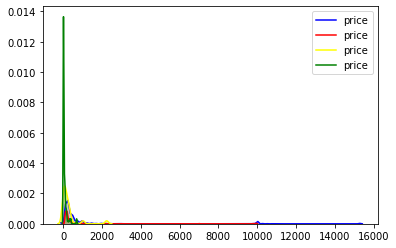

In [59]:
for i in df['room_type'].unique():
    temp = df[df['room_type'] == i]
    sns.kdeplot(temp['price'], shade=True, color=room_colors[i])

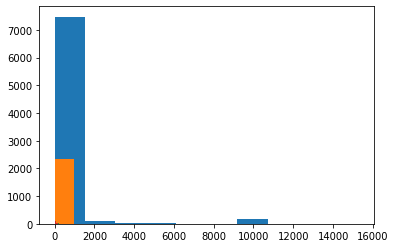

In [61]:
# work on this
for i in df['room_type'].unique():
    temp = df[df['room_type'] == i]
    plt.hist(temp['price'])

## Map of AirBNB Listing Locations

In [62]:
import folium
from folium import plugins
import json

In [63]:
map_df = df[['latitude', 'longitude', 'room_type']]

In [64]:
map_df.head()

latitude  longitude        room_type
0  30.27750  -97.71398  Entire home/apt
1  30.27577  -97.71379     Private room
2  30.26112  -97.73448  Entire home/apt
3  30.24630  -97.76361  Entire home/apt
4  30.45697  -97.78422     Private room

In [65]:
with open(path+'\\data\\atxNeighborhoods.geojson') as f:
    atxArea = json.load(f)

In [66]:
lat, lon = np.mean(map_df.latitude), np.mean(map_df.longitude)

In [67]:
austinMap = folium.Map(location = [lat, lon],
                      titles='Stamen Toner',
                      zoom_start=11)

In [68]:
folium.GeoJson(atxArea).add_to(austinMap)

In [69]:
for i in map_df['room_type'].unique():
    temp = map_df[map_df['room_type'] == i]
    for j, row in temp.iterrows():
        folium.CircleMarker((row.latitude, row.longitude),
                           radius = 2,
                           weight = 2,
                           color = room_colors[i],
                           fill_color = room_colors[i],
                           fill_opacity = 0.2).add_to(austinMap)

In [70]:
austinMap.save('atxMap20200806.html')

In [71]:
austinMap

---

## Data Training and Pre-Processing

In [85]:
df.columns

Index(['neighborhood', 'zipcode', 'latitude', 'longitude', 'property_type',
       'room_type', 'bathrooms', 'bedrooms', 'price'],
      dtype='object')

In [73]:
from sklearn.model_selection import train_test_split

In [86]:
X = df[['bathrooms', 'bedrooms']]

y = df[['price']]

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [88]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7740, 2) (7740, 1)
(2581, 2) (2581, 1)


## Model 1: Linear Regression

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
linReg = LinearRegression()

In [89]:
linReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
print(linReg.score(X_train, y_train))

0.01565650752759906


In [91]:
y_pred = linReg.predict(X_test)

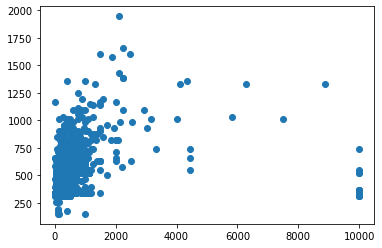

In [92]:
plt.scatter(y_test, y_pred)

Linear model performed poorly as expected, going to try to a Random Forest regression.

## Model 2: Decision Tree Regression

In [93]:
from sklearn.tree import DecisionTreeRegressor

In [112]:
tree_reg = DecisionTreeRegressor(max_depth = 3)

In [113]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [114]:
y_pred = tree_reg.predict(X_test)

In [115]:
from sklearn import tree

[Text(167.4, 190.26, 'X[0] <= 3.75\nmse = 1850749.23\nsamples = 7740\nvalue = 446.577'),
 Text(83.7, 135.9, 'X[0] <= 2.75\nmse = 1799691.644\nsamples = 7516\nvalue = 415.895'),
 Text(41.85, 81.53999999999999, 'X[1] <= 3.5\nmse = 1850779.467\nsamples = 7099\nvalue = 395.064'),
 Text(20.925, 27.180000000000007, 'mse = 1878849.685\nsamples = 6820\nvalue = 386.79'),
 Text(62.775000000000006, 27.180000000000007, 'mse = 1122032.072\nsamples = 279\nvalue = 597.333'),
 Text(125.55000000000001, 81.53999999999999, 'X[1] <= 2.5\nmse = 796834.111\nsamples = 417\nvalue = 770.511'),
 Text(104.625, 27.180000000000007, 'mse = 118290.461\nsamples = 23\nvalue = 290.13'),
 Text(146.475, 27.180000000000007, 'mse = 822187.075\nsamples = 394\nvalue = 798.553'),
 Text(251.10000000000002, 135.9, 'X[0] <= 5.25\nmse = 2472421.255\nsamples = 224\nvalue = 1476.094'),
 Text(209.25, 81.53999999999999, 'X[1] <= 3.5\nmse = 1228483.671\nsamples = 179\nvalue = 1224.268'),
 Text(188.32500000000002, 27.180000000000007, '

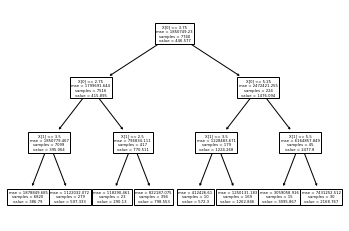

In [116]:
tree.plot_tree(tree_reg)

Not sure where to go from here.

## Model 3: Random Forest Regression

In [118]:
from sklearn.ensemble import RandomForestRegressor

In [119]:
regr = RandomForestRegressor(max_depth = 3, random_state=0)

In [120]:
regr.fit(X_train, y_train)

C:\Users\pam\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [121]:
regr.predict(X_test)

array([375.06375056, 393.32132446, 405.97976693, ..., 375.06375056,
       391.72257285, 405.97976693])

In [1]:
import graphviz
dot_data = tree.export_graphviz(regr, out_file='tree.dot')

ModuleNotFoundError: No module named 'graphviz'